In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib import cm
#import itertools
from numpy.linalg import inv
import random
import math
from scipy.optimize import curve_fit


## WZ term to be calculated 

In [2]:
#Symmetrized random matrix, random values are fix by seed module 
# here the constant random matrix in--- random numbers in the range [0.0,1.0)
np.random.seed(42)
H_const = np.round(np.random.random(size=(2, 2)),2)
print(H_const)
#[[0.37 0.95]
# [0.73 0.6 ]]

# C_4 symmetry operator:
sigma_y = np.zeros((2,2), dtype=np.complex128)
sigma_y[0][1] += -1j
sigma_y[1][0] += 1j
U = -1j*sigma_y


once = np.matmul(H_const.conj().T,U)
twice = np.matmul(np.matmul(inv(U),H_const),U)
three_times = np.matmul(np.matmul(np.matmul(inv(U),H_const.conj().T),U),U)
H_C4 = H_const + once + twice + three_times
print('C_4 symmetrized random matrix:')
print(H_C4)
# to control if the matrix is invariant under four-fold-type rotation
print('rotating once forward:')
rotate_it = np.matmul(U,H_C4.conj().T)
print(np.allclose(rotate_it,H_C4))
print('rotating twice forward:')
once_more = np.matmul(U,rotate_it.conj().T)
print(np.allclose(once_more,H_C4))
n_lamb = 41
lambdda= np.linspace(-2,2,n_lamb)
Bloch_diff_lambda = np.zeros((len(lambdda),2,2), dtype=np.complex128)
#print(Bloch_diff_lambda)

[[0.37 0.95]
 [0.73 0.6 ]]
C_4 symmetrized random matrix:
[[ 0.75+0.j -0.75+0.j]
 [ 0.75+0.j  0.75+0.j]]
rotating once forward:
True
rotating twice forward:
True


In [10]:
%matplotlib qt5
n=20
k_x = np.linspace(0,2*np.pi,n)
k_y = np.linspace(0,2*np.pi,n)
gamma=0.5
lamb=1


def eig_(M, sortby = 'real'):
    """ Returns the eigenvalues, eigenvectors (left and right if the matrix is
    non-symmetric) of a matrix M in an ascending order. sortby = 'real', 'imag' or 'abs'. """
    if np.allclose(M, M.T.conj()):
        evals, evecs = la.eig(M)
        sort_p = (evals.real).argsort()
        evals=evals[sort_p]
        evecs=evecs[:, sort_p]
        return evals, evecs
    else:
        evals, evecs_l, evecs_r = la.eig(M, left = True, right = True)
        if sortby == 'real':
           sort_p = (evals.real).argsort()
        elif sortby == 'imag':
           sort_p = (evals.imag).argsort()
        elif sortby == 'abs':
           sort_p = (np.abs(evals)).argsort()
        evals = evals[sort_p]
        evecs_r = evecs_r[:, sort_p]
        evecs_l = evecs_l[:, sort_p]
        return evals, evecs_l, evecs_r
    
#n_k=20 # number of steps 
#k_x = np.linspace(0,2*np.pi,n_k, endpoint=False)
#k_y = np.linspace(0,2*np.pi,n_k, endpoint=False)
gamma=0.5
lamb = 1
n_lamb = 21
nH_gamma = np.linspace(-2,2,n_lamb)
nH_lambda= np.linspace(-2,2,n_lamb)
H = np.zeros((2,2), dtype=np.complex128)
def Bloch(kx, ky, gamma, lamb, nHgamma, nHlamb):
    H[0,0] = -1j*nHgamma-1j*nHlamb*np.cos(kx)+lamb*np.sin(kx)
    H[0,1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1,0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1,1] = -1j*nHgamma-1j*nHlamb*np.cos(kx)-lamb*np.sin(kx)
    return H


def eigenvalue(kx,ky, gamma, lamb, nHgamma, nHlamb):
    Z=np.zeros((n, n))
    Z2=np.zeros((n, n))
    
    for i in range(n):
        for k in range(n):
            H[0][0] = -1j*nHgamma-1j*nHlamb*np.cos(kx[i][k])+nHlamb*np.sin(kx[i][k])
            H[0][1] = -1j*nHgamma-1j*nHlamb*np.cos(ky[i][k])+nHlamb*np.sin(ky[i][k])
            H[1][0] = 1j*nHgamma+1j*nHlamb*np.cos(ky[i][k])+nHlamb*np.sin(ky[i][k])
            H[1][1] = -1j*nHgamma-1j*nHlamb*np.cos(kx[i][k])-nHlamb*np.sin(kx[i][k])

            results=eig_(H)
            
            if len(results)==2:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
            else:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
            
    return Z, Z2
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
I = np.identity(2)
def eigenvaluePauli(kx,ky, gamma, lamb, nHgamma, nHlamb):
    Z=np.zeros((n, n))
    Z2=np.zeros((n, n))
    
    for i in range(n):
        for k in range(n):
            H1 = -1j*(nHgamma+nHlamb*np.cos(kx[i][k]))*I + lamb*np.sin(kx[i][k])*sigma_z 
            H2 = (gamma+lamb*np.cos(ky[i][k]))*sigma_y + lamb*(np.sin(ky[i][k]))*sigma_x
            H = H1+H2

            results=eig_(H)
            
            if len(results)==2:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
            else:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
            
    return Z, Z2




X, Y = np.meshgrid(k_x, k_y)
Z,Z2 = eigenvalue(X, Y, gamma,lamb, 1, 1)# this are the eigenvalues w.r.t. real part of the energies 
#print(Z,Z2)
Z_min = np.max(Z)
Z2_min = np.min(Z2)
#print(Z_min, Z2_min)

# calculate the upper and lower spectra with different lambdas 

diffs = np.zeros((n_lamb,n_lamb), dtype=np.complex128)

w=0
b1=0
for nHgamma in nH_gamma:
    b2 = 0 
    for nHlamb in nH_lambda:
        Z,Z2 = eigenvaluePauli(X, Y, gamma,lamb, nHgamma, nHlamb) #eigenvalue(k_x,k_y,gamma, lamb, nHgamma, nHlamb)
        Z_min = np.max(Z)
        Z2_min = np.min(Z2)
        #print(Z_min,Z2_min)
        difference = abs(Z2_min-Z_min)
        #print(difference)
        diffs[b1,b2] += difference
        b2+=1
    b1+=1
    
#print(diffs)

<IPython.core.display.Javascript object>


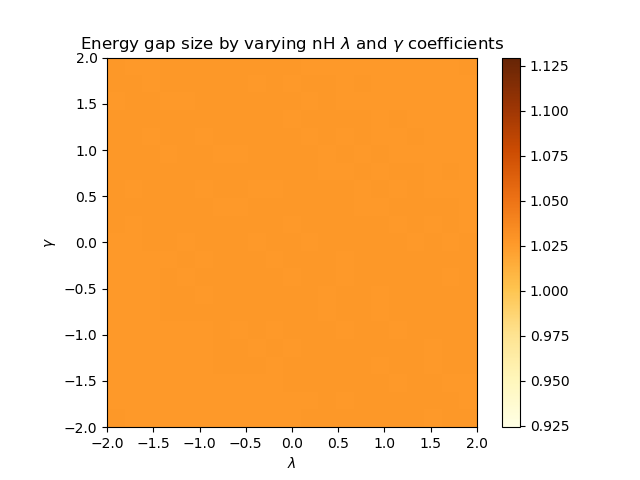

In [12]:
%matplotlib qt5
#C = varying_lambda_integ
dx, dy = 0.001, 0.001
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
diffs = diffs.astype(np.float64)

z = diffs

z_min, z_max = z.min(), z.max() 

c = plt.imshow(z, cmap ='YlOrBr', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 

plt.colorbar(c)
#plt.clim(0.0,0.10)
plt.title('Energy gap size by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 



<IPython.core.display.Javascript object>


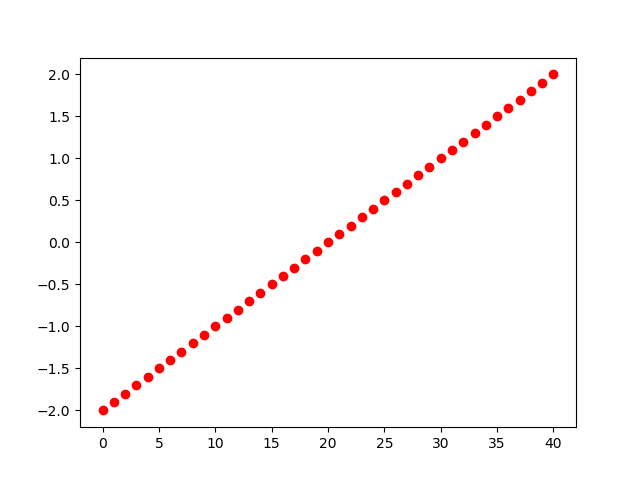

In [13]:
%matplotlib qt5
plt.plot(lambdda,'ro')
plt.show()

In [6]:
# WZ integral for various bloch matrices depending on lambdas 
sigma_z = np.zeros((2,2), dtype=np.complex128)
sigma_z[0][0] += 1
sigma_z[1][1] += -1
n_k=20 # number of steps 
k_x = np.linspace(0,2*np.pi,n_k, endpoint=False)
k_y = np.linspace(0,2*np.pi,n_k, endpoint=False)
gamma=0.5
lamb = 1
n_lamb = 21
nH_gamma = np.linspace(-2,2,n_lamb)
nH_lambda= np.linspace(-2,2,n_lamb)
H = np.zeros((2,2), dtype=np.complex128)
n_t = n_k # number of steps 
t = np.linspace(0,1,n_t)
print(k_x)


def Bloch(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = -1j*nHgamma-1j*nHlamb*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*nHgamma-1j*nHlamb*np.cos(kx)-lamb*np.sin(kx)
    H_WZ = H*(1-t)+sigma_z*t
    return H_WZ

def H1(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = (1-t)*(1j*nHlamb*np.sin(kx)+lamb*np.cos(kx))
    H[0][1] = 0
    H[1][0] = 0
    H[1][1] = (1-t)*(1j*nHlamb*np.sin(kx)-lamb*np.cos(kx))
    return H

def H2(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = 0
    H[0][1] = (1-t)*(1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][0] = (1-t)*(-1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][1] = 0
    return H

def H3(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = -1j*nHgamma-1j*nHlamb*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*nHgamma-1j*nHlamb*np.cos(kx)-lamb*np.sin(kx)
    dt_H_WZ = - H + sigma_z
    return dt_H_WZ

varying_lambda_integ = np.zeros((n_lamb,n_lamb), dtype=np.complex128)
s1=0
for nHgamma in nH_gamma:
    s2 = 0 
    for nHlamb in nH_lambda:
        integ_t = 0
        integ = 0
        for m in range(n_k):
            for j in range(n_k):
                for i in range(n_k):
                    #--------------------------------------------matrix multiplcation for the matrices for trace----
                    Hinv = inv(Bloch(k_x[i],k_y[j],t[m],gamma,lamb, nHgamma, nHlamb))

                    first0 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second0 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third0 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two0 = np.matmul(first0,second0)
                    last_multi0 = np.matmul(first_two0,third0) 

                    first1 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second1 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third1 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two1 = np.matmul(first1,second1)
                    last_multi1 = np.matmul(first_two1,third1) 

                    first2 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second2 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third2 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two2 = np.matmul(first2,second2)
                    last_multi2 = np.matmul(first_two2,third2) 

                    first3 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second3 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third3 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two3 = np.matmul(first3,second3)
                    last_multi3 = np.matmul(first_two3,third3) 

                    first4 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second4 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third4 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two4 = np.matmul(first4,second4)
                    last_multi4 = np.matmul(first_two4,third4) 

                    first5 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second5 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third5 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two5 = np.matmul(first5,second5)
                    last_multi5 = np.matmul(first_two5,third5) 
                    #-------------------------------------# trace of the multiplied matrices ------------------------
                    epsilon0 = 1
                    epsilon1 = -1
                    epsilon2 = -1
                    epsilon3 = 1
                    epsilon4 = 1
                    epsilon5 = -1
                    trace0 = epsilon0*np.trace(last_multi0)
                    trace1 = epsilon1*np.trace(last_multi1)
                    trace2 = epsilon2*np.trace(last_multi2)
                    trace3 = epsilon3*np.trace(last_multi3)
                    trace4 = epsilon4*np.trace(last_multi4)
                    trace5 = epsilon5*np.trace(last_multi5)
                    trace = trace0 + trace1 + trace2 + trace3 + trace4 + trace5
                    #print(trace)
                    #------------------------------------------------------------------------------------------------

                    """if i==0 or j==0 or m==0:
                        integ_t += trace/2
                    elif i==n_k-1 or j == n_k-1 or m==n_k-1:
                        integ_t += trace/2
                    else:
                        integ_t += trace"""
                    integ_t += trace

        integ = integ_t*(2*np.pi)**2/(24*np.pi**2*n_k**3) # (2pi)^2/n_k^3; (2*np.pi)**2
        varying_lambda_integ[s1,s2] = integ   # rows are for a constant gamma and varying lambda 
        s2 +=1
    s1 += 1

print('whole WZ integral:',integ) # (0.49995483203316116-1.7182326886531578e-18j) [0,1/2]

# H_const = sigma_y integral=(-0.5084069190606505+2.71307137635531e-20j)
# if H_const is C4 symmetric then the integral becomes (-2.053031899346136e-14+2.595160675888785j)

#print(varying_lambda_integ)
print(np.round(np.real(varying_lambda_integ),2))


[0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604]
whole WZ integral: (0.2594462528614848-1.4524418733478624e-18j)
[[-0.26 -0.18 -0.12 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01 -0.01  0.    0.01
   0.01  0.02  0.03  0.04  0.06  0.09  0.12  0.18  0.26]
 [-0.35 -0.26 -0.19 -0.13 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.01
   0.02  0.03  0.04  0.06  0.09  0.13  0.19  0.26  0.35]
 [-0.43 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.04 -0.02 -0.01 -0.    0.01
   0.02  0.04  0.06  0.09  0.13  0.19  0.27  0.36  0.43]
 [-0.49 -0.44 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.03 -0.02 -0.    0.02
   0.03  0.06  0.09  0.13  0.19  0.27  0.36  0.44  0.49]
 [-0.55 -0.5  -0.44 -0.37 -0.28 -0.19 -0.13 -0.08 -0.05 -0.02  0.    0.02
   0.05  0.08  0.13  0.19  0.28  0.37  0.44  0.5   0.55]
 [-0.57 -0.55 -0.51 -0.45 -0.37 -0.28 -0.19 -0.12 -0.07 

In [38]:
len(z[0])
print(nH_gamma)
print(np.where(nH_gamma==1)[0][0])
print(np.round(np.real(z),2))


[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]
15
[[-0.26 -0.18 -0.12 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01 -0.01  0.    0.01
   0.01  0.02  0.03  0.04  0.06  0.09  0.12  0.18  0.26]
 [-0.35 -0.26 -0.19 -0.13 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.01
   0.02  0.03  0.04  0.06  0.09  0.13  0.19  0.26  0.35]
 [-0.43 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.04 -0.02 -0.01 -0.    0.01
   0.02  0.04  0.06  0.09  0.13  0.19  0.27  0.36  0.43]
 [-0.49 -0.44 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.03 -0.02 -0.    0.02
   0.03  0.06  0.09  0.13  0.19  0.27  0.36  0.44  0.49]
 [-0.55 -0.5  -0.44 -0.37 -0.28 -0.19 -0.13 -0.08 -0.05 -0.02  0.    0.02
   0.05  0.08  0.13  0.19  0.28  0.37  0.44  0.5   0.55]
 [-0.57 -0.55 -0.51 -0.45 -0.37 -0.28 -0.19 -0.12 -0.07 -0.03 -0.    0.03
   0.07  0.12  0.19  0.28  0.37  0.45  0.51  0.55  0.57]
 [-0.6  -0.58 -0.55 -0.51 -0.45 -0.37 -0.28 -0.18 -0.11 -0.05 -0.    0.05
   0.11  0.18  0.28  0.37  0.

<IPython.core.display.Javascript object>


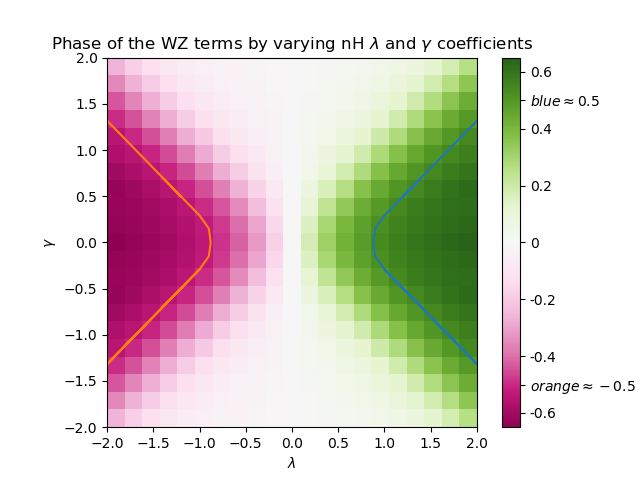

In [33]:
%matplotlib qt5

fig, ax = plt.subplots()
dx, dy = 0.2, 0.2
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
varying_lambda_integ = varying_lambda_integ.astype(np.float64)

z = varying_lambda_integ

z_min, z_max = z.min(), z.max() 
  
c = plt.imshow(z, cmap ='PiYG', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 


#for x_val, y_val in zip(x.flatten(), y.flatten()):
 #   i = np.where(nH_gamma==x_val)[0][0]
 #   j = np.where(nH_gamma==y_val)[0][0]
 #   #zero_x = y.flatten()[np.where(np.isclose(y_val,0,rtol=1e-04))]
 #   color = 'x' if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
 #   ax.text(x_val, y_val, color, va='center', ha='center')
 #   color1 = 'o' if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
 #   ax.text(x_val, y_val, color1, va='center', ha='center')

x_green = np.array([2.,  1.8, 2., 1.6, 1.8, 1.2, 1.4, 1.6, 1.2, 1.4, 1.,1.2, 1.,0.9,0.88, 0.9, 1.,  1.,  1.2, 1.2, 1.4, 1.2, 1.4, 1.6, 1.6, 1.8, 1.8, 2.,  2. ])
y_green = np.array([-1.316, -1.111, -1.316, -0.906, -1.111, -0.496, -0.701, -0.906, -0.496, -0.701,
 -0.291, -0.496, -0.291,  -0.15, 0,0.15, 0.291, 0.291, 0.496, 0.496, 0.701, 0.496, 0.701, 0.906, 0.906,
 1.111, 1.111, 1.316, 1.316])

plt.plot(x_green,y_green,'-')
x_pink_g = -np.array([2.,  1.8, 2., 1.6, 1.8, 1.2, 1.4, 1.6, 1.2, 1.4, 1.,1.2, 1.,0.9,0.88, 0.9, 1.,  1.,  1.2, 1.2, 1.4, 1.2, 1.4, 1.6, 1.6, 1.8, 1.8, 2.,  2. ])
y_pink_g = np.array([-1.316, -1.111, -1.316, -0.906, -1.111, -0.496, -0.701, -0.906, -0.496, -0.701,
 -0.291, -0.496, -0.291, -0.15, 0,0.15, 0.291, 0.291, 0.496, 0.496, 0.701, 0.496, 0.701, 0.906, 0.906,
 1.111, 1.111, 1.316, 1.316])
plt.plot(x_pink_g,y_pink_g,'-')


cbar=plt.colorbar(c) 
cbar.set_ticks([-0.6,-0.5,-0.4,-0.2,0,0.2,0.4,0.5,0.6])
cbar.set_ticklabels([-0.6,r'$orange\approx-0.5$',-0.4,-0.2,0,0.2,0.4,r'$blue\approx0.5$',0.6])
#cbar.set_ticks([-0.6,-0.5,-0.4,-0.2,0,0.2,0.4,0.5,0.6])
#cbar.set_ticklabels([-0.6,r'$o\approx-0.5$',-0.4,-0.2,0,0.2,0.4,r'$x\approx0.5$',0.6])

plt.title('Phase of the WZ terms by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 

<IPython.core.display.Javascript object>


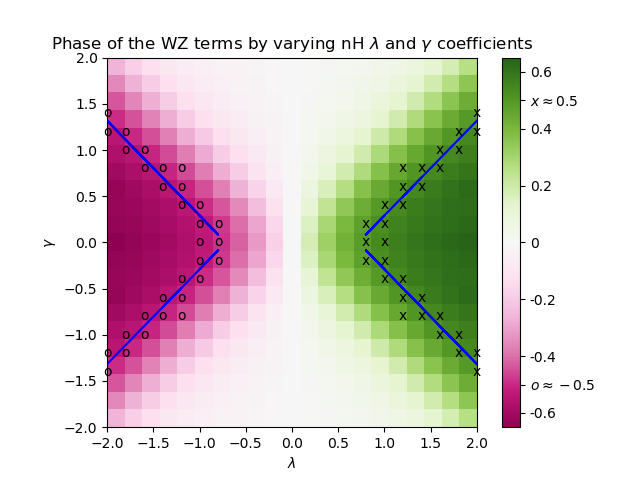

x: [2.  1.8 2.  1.6 1.8 1.2 1.4 1.6 1.2 1.4 1.  1.2 0.8 1.  0.8 1. ]
line: [-1.316 -1.111 -1.316 -0.906 -1.111 -0.496 -0.701 -0.906 -0.496 -0.701
 -0.291 -0.496 -0.086 -0.291 -0.086 -0.291]
x: [0.8 1.  0.8 1.  1.  1.2 1.2 1.4 1.2 1.4 1.6 1.6 1.8 1.8 2.  2. ]
line: [0.086 0.291 0.086 0.291 0.291 0.496 0.496 0.701 0.496 0.701 0.906 0.906
 1.111 1.111 1.316 1.316]


In [34]:
%matplotlib qt5
#C = varying_lambda_integ
fig, ax = plt.subplots()
dx, dy = 0.2, 0.2
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
varying_lambda_integ = varying_lambda_integ.astype(np.float64)

z = varying_lambda_integ

z_min, z_max = z.min(), z.max() 
  
c = plt.imshow(z, cmap ='PiYG', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 

data_x_x = []
data_x_y = []
data_x_x1 = []
data_x_y1 = []

data_o_x = []
data_o_y = []
data_o_x1 = []
data_o_y1 = []

for x_val, y_val in zip(x.flatten(), y.flatten()):
    i = np.where(nH_gamma==x_val)[0][0]
    j = np.where(nH_gamma==y_val)[0][0]
    #zero_x = y.flatten()[np.where(np.isclose(y_val,0,rtol=1e-04))]
    color = 'x' if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
    if y_val>=-0.1:
        data_x_x.append(x_val) if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
        data_x_y.append(y_val) if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
    if y_val<=0:
        data_x_x1.append(x_val) if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
        data_x_y1.append(y_val) if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
        
    if y_val>=0:
        data_o_x.append(x_val) if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
        data_o_y.append(y_val) if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
    if y_val<=0:
        data_o_x1.append(x_val) if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
        data_o_y1.append(y_val) if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
    ax.text(x_val, y_val, color, va='center', ha='center')
    color1 = 'o' if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
    ax.text(x_val, y_val, color1, va='center', ha='center')

#print(zero_x)
    
data_x_x = np.array(data_x_x)
data_x_y = np.array(data_x_y)
data_x_x1 = np.array(data_x_x1)
data_x_y1 = np.array(data_x_y1)
m, b = np.polyfit(data_x_x, data_x_y, 1)
plt.plot(data_x_x, m*data_x_x + b, 'b-')
m1, b1 = np.polyfit(data_x_x1, data_x_y1, 1)
plt.plot(data_x_x1, m1*data_x_x1 + b1, 'b-')

print('x:', data_x_x1)
print('line:', np.round(m1*data_x_x1 + b1,3))
print('x:', data_x_x)
print('line:', np.round(m*data_x_x + b,3))
data_o_x = np.array(data_o_x)
data_o_y = np.array(data_o_y)
data_o_x1 = np.array(data_o_x1)
data_o_y1 = np.array(data_o_y1)
m2, b2 = np.polyfit(data_o_x, data_x_y, 1)
plt.plot(data_o_x, m2*data_o_x + b2, 'b-')
m3, b3 = np.polyfit(data_o_x1, data_o_y1, 1)
plt.plot(data_o_x1, m3*data_o_x1 + b3, 'b-')



cbar=plt.colorbar(c) 
cbar.set_ticks([-0.6,-0.5,-0.4,-0.2,0,0.2,0.4,0.5,0.6])
cbar.set_ticklabels([-0.6,r'$o\approx-0.5$',-0.4,-0.2,0,0.2,0.4,r'$x\approx0.5$',0.6])

plt.title('Phase of the WZ terms by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 

<IPython.core.display.Javascript object>


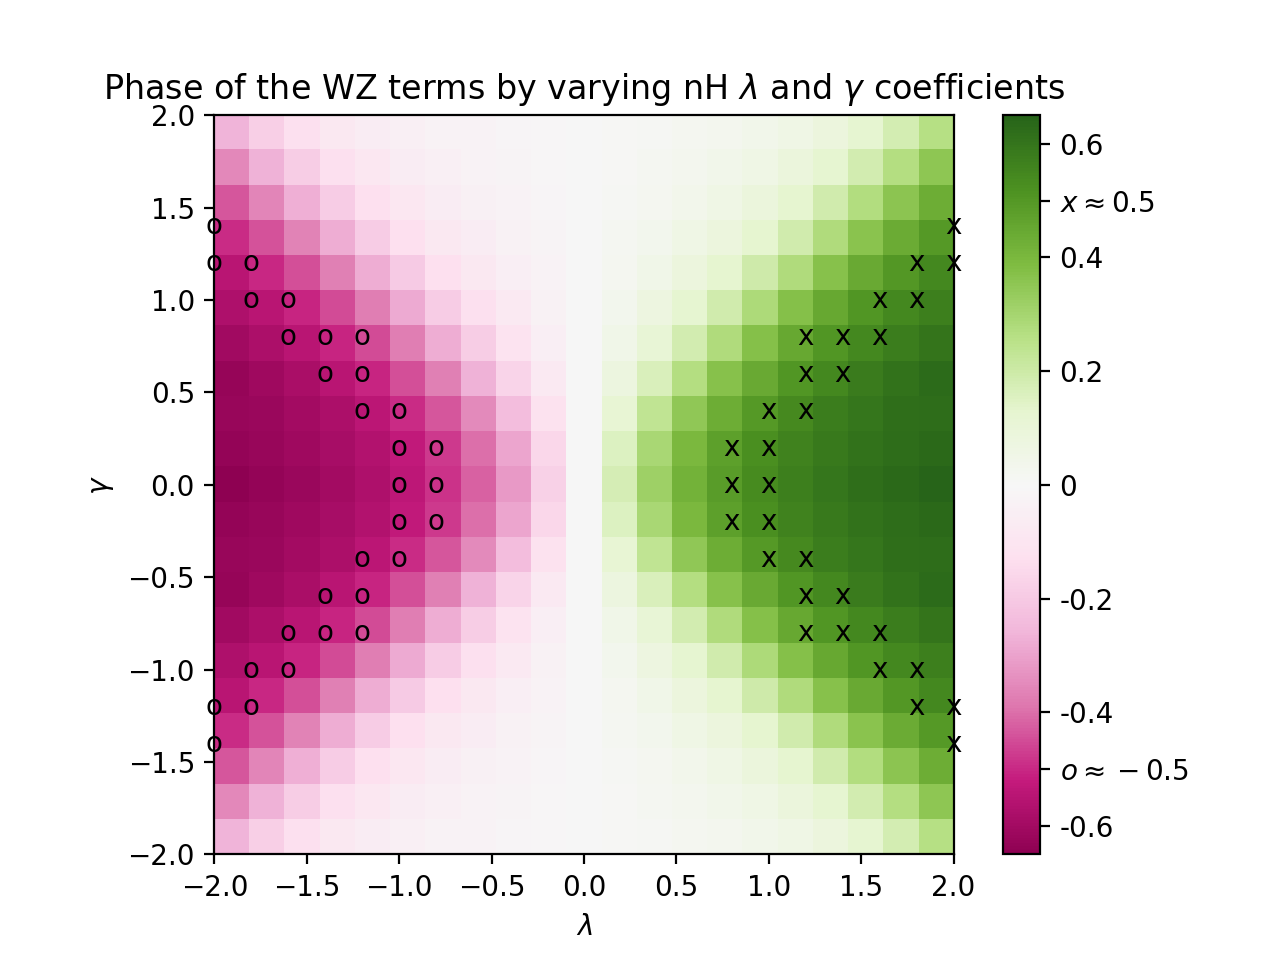

In [30]:
%matplotlib qt5
#C = varying_lambda_integ
fig, ax = plt.subplots()
dx, dy = 0.2, 0.2
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
varying_lambda_integ = varying_lambda_integ.astype(np.float64)

z = varying_lambda_integ

z_min, z_max = z.min(), z.max() 
  
c = plt.imshow(z, cmap ='PiYG', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 

for x_val, y_val in zip(x.flatten(), y.flatten()):
    i = np.where(nH_gamma==x_val)[0][0]
    j = np.where(nH_gamma==y_val)[0][0]
    color = 'x' if np.isclose(np.real(z[j,i]), 0.5, rtol=1e-01) else ''
    ax.text(x_val, y_val, color, va='center', ha='center')
    color1 = 'o' if np.isclose(np.real(z[j,i]), -0.5, rtol=1e-01) else ''
    ax.text(x_val, y_val, color1, va='center', ha='center')

#set tick marks for grid

#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax.set_xlim(min_val-diff/2, max_val-diff/2)
#ax.set_ylim(min_val-diff/2, max_val-diff/2)

cbar=plt.colorbar(c) 
cbar.set_ticks([-0.6,-0.5,-0.4,-0.2,0,0.2,0.4,0.5,0.6])
cbar.set_ticklabels([-0.6,r'$o\approx-0.5$',-0.4,-0.2,0,0.2,0.4,r'$x\approx0.5$',0.6])
#cax = ax.imshow(data, cmap=cm.coolwarm)
#ax.set_title('Gaussian noise with vertical colorbar')

# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(c, ticks=[-1, 0, 1])
#cbar.ax.set_yticklabels(['< -1', '0', '> 1']) 
#for y_index, y in enumerate(y_positions):
 #   for x_index, x in enumerate(x_positions):
  #      label = data[y_index, x_index]
   #     text_x = x + jump_x
    #    text_y = y + jump_y
     #   ax.text(text_x, text_y, label, color='black', ha='center', va='center')

#plt.clim(0.0,0.10)
plt.title('Phase of the WZ terms by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 


In [38]:
print(np.round(varying_lambda_integ,2))
#this is what is calculated; store them in form of an array
array= np.array([[-0.26 -0.18 -0.12 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01 -0.01  0.    0.01
   0.01  0.02  0.03  0.04  0.06  0.09  0.12  0.18  0.26]
 [-0.35 -0.26 -0.19 -0.13 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.01
   0.02  0.03  0.04  0.06  0.09  0.13  0.19  0.26  0.35]
 [-0.43 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.04 -0.02 -0.01 -0.    0.01
   0.02  0.04  0.06  0.09  0.13  0.19  0.27  0.36  0.43]
 [-0.49 -0.44 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.03 -0.02 -0.    0.02
   0.03  0.06  0.09  0.13  0.19  0.27  0.36  0.44  0.49]
 [-0.55 -0.5  -0.44 -0.37 -0.28 -0.19 -0.13 -0.08 -0.05 -0.02  0.    0.02
   0.05  0.08  0.13  0.19  0.28  0.37  0.44  0.5   0.55]
 [-0.57 -0.55 -0.51 -0.45 -0.37 -0.28 -0.19 -0.12 -0.07 -0.03 -0.    0.03
   0.07  0.12  0.19  0.28  0.37  0.45  0.51  0.55  0.57]
 [-0.6  -0.58 -0.55 -0.51 -0.45 -0.37 -0.28 -0.18 -0.11 -0.05 -0.    0.05
   0.11  0.18  0.28  0.37  0.45  0.51  0.55  0.58  0.6 ]
 [-0.63 -0.61 -0.58 -0.55 -0.51 -0.45 -0.37 -0.27 -0.16 -0.08  0.    0.08
   0.16  0.27  0.37  0.45  0.51  0.55  0.58  0.61  0.63]
 [-0.62 -0.61 -0.6  -0.58 -0.54 -0.5  -0.43 -0.35 -0.23 -0.11 -0.    0.11
   0.23  0.35  0.43  0.5   0.54  0.58  0.6   0.61  0.62]
 [-0.63 -0.62 -0.61 -0.59 -0.56 -0.52 -0.47 -0.4  -0.29 -0.16  0.    0.16
   0.29  0.4   0.47  0.52  0.56  0.59  0.61  0.62  0.63]
 [-0.65 -0.63 -0.62 -0.6  -0.57 -0.53 -0.49 -0.42 -0.32 -0.18 -0.    0.18
   0.32  0.42  0.49  0.53  0.57  0.6   0.62  0.63  0.65]
 [-0.63 -0.62 -0.61 -0.59 -0.56 -0.52 -0.47 -0.4  -0.29 -0.16  0.    0.16
   0.29  0.4   0.47  0.52  0.56  0.59  0.61  0.62  0.63]
 [-0.62 -0.61 -0.6  -0.58 -0.54 -0.5  -0.43 -0.35 -0.23 -0.11 -0.    0.11
   0.23  0.35  0.43  0.5   0.54  0.58  0.6   0.61  0.62]
 [-0.63 -0.61 -0.58 -0.55 -0.51 -0.45 -0.37 -0.27 -0.16 -0.08 -0.    0.08
   0.16  0.27  0.37  0.45  0.51  0.55  0.58  0.61  0.63]
 [-0.6  -0.58 -0.55 -0.51 -0.45 -0.37 -0.28 -0.18 -0.11 -0.05  0.    0.05
   0.11  0.18  0.28  0.37  0.45  0.51  0.55  0.58  0.6 ]
 [-0.57 -0.55 -0.51 -0.45 -0.37 -0.28 -0.19 -0.12 -0.07 -0.03 -0.    0.03
   0.07  0.12  0.19  0.28  0.37  0.45  0.51  0.55  0.57]
 [-0.55 -0.5  -0.44 -0.37 -0.28 -0.19 -0.13 -0.08 -0.05 -0.02 -0.    0.02
   0.05  0.08  0.13  0.19  0.28  0.37  0.44  0.5   0.55]
 [-0.49 -0.44 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.03 -0.02 -0.    0.02
   0.03  0.06  0.09  0.13  0.19  0.27  0.36  0.44  0.49]
 [-0.43 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.04 -0.02 -0.01 -0.    0.01
   0.02  0.04  0.06  0.09  0.13  0.19  0.27  0.36  0.43]
 [-0.35 -0.26 -0.19 -0.13 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.01
   0.02  0.03  0.04  0.06  0.09  0.13  0.19  0.26  0.35]
 [-0.26 -0.18 -0.12 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01 -0.01  0.    0.01
   0.01  0.02  0.03  0.04  0.06  0.09  0.12  0.18  0.26]])


# Input string.
s = "lowercase a,uppercase A,lowercase z"

# Separate on comma.
values = s.split(",")

# Loop and print each string.
for value in values:
    print(value)
    
    

[[-0.26 -0.18 -0.12 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01 -0.01  0.    0.01
   0.01  0.02  0.03  0.04  0.06  0.09  0.12  0.18  0.26]
 [-0.35 -0.26 -0.19 -0.13 -0.09 -0.06 -0.04 -0.03 -0.02 -0.01  0.    0.01
   0.02  0.03  0.04  0.06  0.09  0.13  0.19  0.26  0.35]
 [-0.43 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.04 -0.02 -0.01 -0.    0.01
   0.02  0.04  0.06  0.09  0.13  0.19  0.27  0.36  0.43]
 [-0.49 -0.44 -0.36 -0.27 -0.19 -0.13 -0.09 -0.06 -0.03 -0.02 -0.    0.02
   0.03  0.06  0.09  0.13  0.19  0.27  0.36  0.44  0.49]
 [-0.55 -0.5  -0.44 -0.37 -0.28 -0.19 -0.13 -0.08 -0.05 -0.02  0.    0.02
   0.05  0.08  0.13  0.19  0.28  0.37  0.44  0.5   0.55]
 [-0.57 -0.55 -0.51 -0.45 -0.37 -0.28 -0.19 -0.12 -0.07 -0.03 -0.    0.03
   0.07  0.12  0.19  0.28  0.37  0.45  0.51  0.55  0.57]
 [-0.6  -0.58 -0.55 -0.51 -0.45 -0.37 -0.28 -0.18 -0.11 -0.05 -0.    0.05
   0.11  0.18  0.28  0.37  0.45  0.51  0.55  0.58  0.6 ]
 [-0.63 -0.61 -0.58 -0.55 -0.51 -0.45 -0.37 -0.27 -0.16 -0.08  0.    0.08
   0.16  

/Users/anar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


<IPython.core.display.Javascript object>


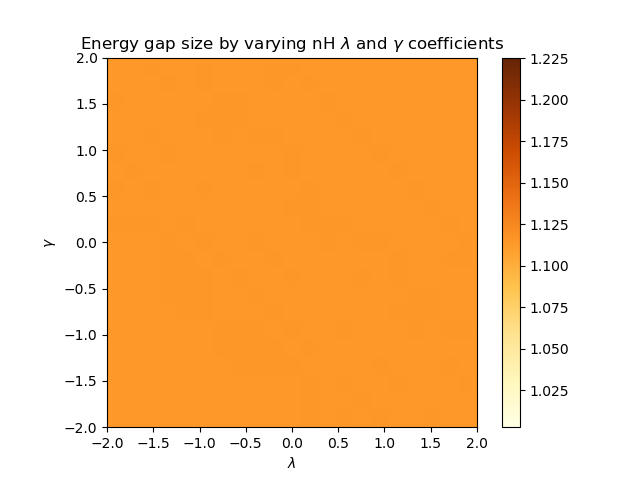

In [37]:
%matplotlib qt5
#C = varying_lambda_integ
dx, dy = 0.001, 0.001
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
diffs = diffs.astype(np.float64)

z = diffs

z_min, z_max = z.min(), z.max() 

c = plt.imshow(z, cmap ='YlOrBr', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 

plt.colorbar(c)
#plt.clim(0.0,0.10)
plt.title('Energy gap size by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 


In [9]:
%matplotlib qt5
#C = varying_lambda_integ
dx, dy = 0.001, 0.001
y, x = np.mgrid[slice(-2, 2 + dy, dy), 
                slice(-2, 2 + dx, dx)] 
diffs = diffs.astype(np.float64)

z = diffs

z_min, z_max = z.min(), z.max() 

c = plt.imshow(z, cmap ='YlOrBr', vmin = z_min, vmax = z_max,
                 extent =[x.min(), x.max(), y.min(), y.max()],
                    interpolation ='nearest', origin ='lower') 

plt.colorbar(c)
#plt.clim(0.0,0.10)
plt.title('Energy gap size by varying nH $\lambda$ and $\gamma$ coefficients')
plt.xlabel('$\lambda$')
plt.ylabel('$\gamma$')
plt.show() 



In [9]:
# WZ integral for various bloch matrices depending on lambdas 
sigma_z = np.zeros((2,2), dtype=np.complex128)
sigma_z[0][0] += 1
sigma_z[1][1] += -1
n_k=60 # number of steps 
k_x = np.linspace(0,2*np.pi,n_k, endpoint=False)
k_y = np.linspace(0,2*np.pi,n_k, endpoint=False)
gamma=0.5
lamb = 1
n_lamb = 41
nH_gamma = np.linspace(-2,2,n_lamb)
nH_lambda= np.linspace(-2,2,n_lamb)
H = np.zeros((2,2), dtype=np.complex128)
n_t = n_k # number of steps 
t = np.linspace(0,1,n_t)
print(k_x)


def Bloch(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = -1j*nHgamma-1j*nHlamb*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*nHgamma-1j*nHlamb*np.cos(kx)-lamb*np.sin(kx)
    H_WZ = H*(1-t)+sigma_z*t
    return H_WZ

def H1(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = (1-t)*(1j*nHlamb*np.sin(kx)+lamb*np.cos(kx))
    H[0][1] = 0
    H[1][0] = 0
    H[1][1] = (1-t)*(1j*nHlamb*np.sin(kx)-lamb*np.cos(kx))
    return H

def H2(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = 0
    H[0][1] = (1-t)*(1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][0] = (1-t)*(-1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][1] = 0
    return H

def H3(kx, ky, t, gamma, lamb, nHgamma, nHlamb):
    H[0][0] = -1j*nHgamma-1j*nHlamb*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*nHgamma-1j*nHlamb*np.cos(kx)-lamb*np.sin(kx)
    dt_H_WZ = - H + sigma_z
    return dt_H_WZ

varying_lambda_integ = np.zeros((n_lamb,n_lamb), dtype=np.complex128)

s2=0
for nHgamma in nH_gamma:
    s1=0
    for nHlamb in nH_lambda:
        integ_t = 0
        integ = 0
        for m in range(n_k):
            for j in range(n_k):
                for i in range(n_k):
                    #--------------------------------------------matrix multiplcation for the matrices for trace----
                    Hinv = inv(Bloch(k_x[i],k_y[j],t[m],gamma,lamb, nHgamma, nHlamb))

                    first0 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second0 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third0 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two0 = np.matmul(first0,second0)
                    last_multi0 = np.matmul(first_two0,third0) 

                    first1 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second1 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third1 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two1 = np.matmul(first1,second1)
                    last_multi1 = np.matmul(first_two1,third1) 

                    first2 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second2 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third2 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two2 = np.matmul(first2,second2)
                    last_multi2 = np.matmul(first_two2,third2) 

                    first3 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second3 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third3 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two3 = np.matmul(first3,second3)
                    last_multi3 = np.matmul(first_two3,third3) 

                    first4 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second4 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third4 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two4 = np.matmul(first4,second4)
                    last_multi4 = np.matmul(first_two4,third4) 

                    first5 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    second5 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    third5 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb, nHgamma, nHlamb))
                    first_two5 = np.matmul(first5,second5)
                    last_multi5 = np.matmul(first_two5,third5) 
                    #-------------------------------------# trace of the multiplied matrices ------------------------
                    epsilon0 = 1
                    epsilon1 = -1
                    epsilon2 = -1
                    epsilon3 = 1
                    epsilon4 = 1
                    epsilon5 = -1
                    trace0 = epsilon0*np.trace(last_multi0)
                    trace1 = epsilon1*np.trace(last_multi1)
                    trace2 = epsilon2*np.trace(last_multi2)
                    trace3 = epsilon3*np.trace(last_multi3)
                    trace4 = epsilon4*np.trace(last_multi4)
                    trace5 = epsilon5*np.trace(last_multi5)
                    trace = trace0 + trace1 + trace2 + trace3 + trace4 + trace5
                    #print(trace)
                    #------------------------------------------------------------------------------------------------

                    """if i==0 or j==0 or m==0:
                        integ_t += trace/2
                    elif i==n_k-1 or j == n_k-1 or m==n_k-1:
                        integ_t += trace/2
                    else:
                        integ_t += trace"""
                    integ_t += trace
        
        integ = integ_t*(2*np.pi)**2/(24*np.pi**2*n_k**3) # (2pi)^2/n_k^3; (2*np.pi)**2
        varying_lambda_integ[s1,s2] = integ
        s1 +=1
    s2 += 1

print('whole WZ integral:',integ) # (0.49995483203316116-1.7182326886531578e-18j) [0,1/2]

# H_const = sigma_y integral=(-0.5084069190606505+2.71307137635531e-20j)
# if H_const is C4 symmetric then the integral becomes (-2.053031899346136e-14+2.595160675888785j)

#print(varying_lambda_integ)
print(np.round(np.real(varying_lambda_integ),2))
print(lambdda)

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878
 0.62831853 0.73303829 0.83775804 0.9424778  1.04719755 1.15191731
 1.25663706 1.36135682 1.46607657 1.57079633 1.67551608 1.78023584
 1.88495559 1.98967535 2.0943951  2.19911486 2.30383461 2.40855437
 2.51327412 2.61799388 2.72271363 2.82743339 2.93215314 3.0368729
 3.14159265 3.24631241 3.35103216 3.45575192 3.56047167 3.66519143
 3.76991118 3.87463094 3.97935069 4.08407045 4.1887902  4.29350996
 4.39822972 4.50294947 4.60766923 4.71238898 4.81710874 4.92182849
 5.02654825 5.131268   5.23598776 5.34070751 5.44542727 5.55014702
 5.65486678 5.75958653 5.86430629 5.96902604 6.0737458  6.17846555]


KeyboardInterrupt: 

In [5]:
%matplotlib qt5

plt.style.use('seaborn-darkgrid')
plt.scatter(lambdda, np.round(np.real(varying_lambda_integ),2), s=10, c=diffs, cmap='viridis')
plt.title('WZ-terms by varying $\lambda\in [-2,2]$ and $\gamma=0.5$')
plt.colorbar()
plt.xlabel('$\lambda$ values')
plt.ylabel('WZ integral')
#plt.xlim([-6,6])
#plt.ylim([-0.7, 0.7])
plt.show()

NameError: name 'varying_lambda_integ' is not defined

In [17]:
f = 0
for s in range(n_lamb):
    for m in range(n_k):
        for j in range(n_k):
            for i in range(n_k):
                f+=1
print(f)

21970


In [8]:
%matplotlib qt5
plt.plot(lambdda,'ro')
plt.show()